In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city_data = 'raw_data/city_data.csv'
ride_data = 'raw_data/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
grp_city_data = ride_data_df.groupby(['city'])

In [6]:
cities_ride_count_df = pd.DataFrame(grp_city_data['ride_id'].count())
cities_ride_count_df.rename(columns={'ride_id':'number_of_rides'}, inplace=True)
avg_city_fare_df = pd.DataFrame(grp_city_data['fare'].mean())
avg_city_fare_df.rename(columns={'fare':'average_fare'}, inplace=True)
city_revenue_df = pd.DataFrame(grp_city_data['fare'].sum())
city_revenue_df.rename(columns={'fare':'total_fares'}, inplace=True)

In [7]:
adj_city_data_df = city_data_df.set_index(['city'])
adj_city_data_df.head()

,driver_count,type
city,,
Kelseyland,63,Urban
Nguyenbury,8,Urban
East Douglas,12,Urban
West Dawnfurt,34,Urban
Rodriguezburgh,52,Urban


In [8]:
comb_city_data_df = cities_ride_count_df.join(avg_city_fare_df, how='outer').join(adj_city_data_df, how='outer').join(city_revenue_df, how='outer')
comb_city_data_df.head()

,number_of_rides,average_fare,driver_count,type,total_fares
city,,,,,
Alvarezhaven,31,23.928710,21,Urban,741.79
Alyssaberg,26,20.609615,67,Urban,535.85
Anitamouth,9,37.315556,16,Suburban,335.84
Antoniomouth,22,23.625000,21,Urban,519.75
Aprilchester,19,21.981579,49,Urban,417.65


In [9]:
adj_comb_city_data_df = comb_city_data_df.reset_index()
adj_comb_city_data_df.head()

,city,number_of_rides,average_fare,driver_count,type,total_fares
0,Alvarezhaven,31,23.928710,21,Urban,741.79
1,Alyssaberg,26,20.609615,67,Urban,535.85
2,Anitamouth,9,37.315556,16,Suburban,335.84
3,Antoniomouth,22,23.625000,21,Urban,519.75
4,Aprilchester,19,21.981579,49,Urban,417.65


In [10]:
grp_mkt_type = adj_comb_city_data_df.groupby(['type'])
mkt_type_df = pd.DataFrame(grp_mkt_type['number_of_rides','driver_count','total_fares'].sum())
mkt_type_df

,number_of_rides,driver_count,total_fares
type,,,
Rural,125,104,4255.09
Suburban,657,638,20335.69
Urban,1625,2607,40078.34


In [24]:
total_revenue = round(ride_data_df['fare'].sum(),2)
total_rides = ride_data_df['ride_id'].count()
total_drivers = city_data_df['driver_count'].sum()
#print(f'Total Revenue is {total_revenue}')
#print(f'Total rides are {total_rides}')
#print(f'Total drivers are {total_drivers}')

Total Revenue is 63651.31
Total rides are 2375
Total drivers are 3349


In [22]:
market_type = mkt_type_df.index
numb_of_rides = mkt_type_df['number_of_rides']
drvr_count = mkt_type_df['driver_count']
mkt_typ_rev = mkt_type_df['total_fares']
colors = ['gold', 'lightskyblue', 'lightcoral']

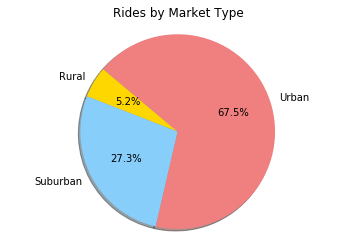

In [27]:
#Rides by market type
plt.pie(numb_of_rides, labels=market_type, colors=colors, autopct= '%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Rides by Market Type')
plt.show()

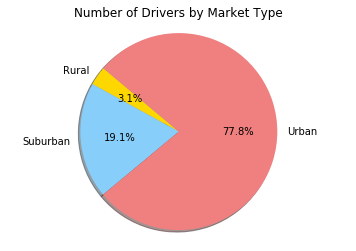

In [28]:
#Total number of drives by market type
plt.pie(drvr_count, labels=market_type, colors=colors, autopct= '%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Number of Drivers by Market Type')
plt.show()

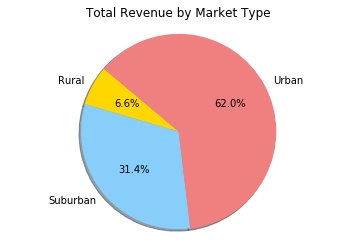

In [29]:
# Total revenue by market type
plt.pie(mkt_typ_rev, labels=market_type, colors=colors, autopct= '%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total Revenue by Market Type')
plt.show()